### **NAME: VICTOR OMOBOYE**
### **STUDENT ID: OMO22599453**

# **TESLA STOCK PRICE PREDICTION USING TIME SERIES ANALYSIS - LSTM**

## **IMPORING ESSENTIAL LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from google.colab import drive

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode

from sklearn.metrics import (mean_squared_error, mean_absolute_error, explained_variance_score, r2_score,
                             mean_poisson_deviance, mean_gamma_deviance, accuracy_score)
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (LSTM, Dropout, Dense, BatchNormalization, Bidirectional, Conv1D,
                                     MaxPooling1D, Flatten)
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, ModelCheckpoint, TensorBoard
from tensorflow.keras.optimizers import Adam

# Initialize Plotly for interactive plots
init_notebook_mode(connected=True)

# **`IMPORTING DATA`**

In [2]:
# Mount Google Drive
drive.mount('/content/drive')
#Load Data
#https://www.kaggle.com/datasets/jillanisofttech/tesla-stock-price/data
#https://drive.google.com/file/d/19U1sMLptvEzix155zOegEVxUGHoZ77ZF/view?usp=drive_link
data = pd.read_csv('/content/drive/MyDrive/Tasla_Stock_Market.csv')
data.head()

Mounted at /content/drive


Unnamed: 0      Date       Open       High        Low      Close    Volume
0           0  1/2/2015  14.858000  14.883333  14.217333  14.620667  71466000
1           1  1/5/2015  14.303333  14.433333  13.810667  14.006000  80527500
2           2  1/6/2015  14.004000  14.280000  13.614000  14.085333  93928500
3           3  1/7/2015  14.223333  14.318667  13.985333  14.063333  44526000
4           4  1/8/2015  14.187333  14.253333  14.000667  14.041333  51637500

## **EXPLORING AND RESORTING THE DATA**

In [3]:
#Drop the unnamed colume
data.drop(['Unnamed: 0'],axis=1,inplace=True)
data

Date        Open        High         Low       Close     Volume
0      1/2/2015   14.858000   14.883333   14.217333   14.620667   71466000
1      1/5/2015   14.303333   14.433333   13.810667   14.006000   80527500
2      1/6/2015   14.004000   14.280000   13.614000   14.085333   93928500
3      1/7/2015   14.223333   14.318667   13.985333   14.063333   44526000
4      1/8/2015   14.187333   14.253333   14.000667   14.041333   51637500
...         ...         ...         ...         ...         ...        ...
2269   1/9/2024  238.110001  238.960007  232.039993  234.960007   96705700
2270  1/10/2024  235.100006  235.500000  231.289993  233.940002   91628500
2271  1/11/2024  230.570007  230.929993  225.369995  227.220001  105873600
2272  1/12/2024  220.080002  225.339996  217.149994  218.889999  122889000
2273  1/16/2024  215.100006  223.490005  212.180100  219.910004  115064708

[2274 rows x 6 columns]

In [4]:
# Set the date to be the index
data.set_index('Date',inplace = True)
data.index = pd.to_datetime(data.index, format='%m/%d/%Y')
data.head()

Open       High        Low      Close    Volume
Date                                                            
2015-01-02  14.858000  14.883333  14.217333  14.620667  71466000
2015-01-05  14.303333  14.433333  13.810667  14.006000  80527500
2015-01-06  14.004000  14.280000  13.614000  14.085333  93928500
2015-01-07  14.223333  14.318667  13.985333  14.063333  44526000
2015-01-08  14.187333  14.253333  14.000667  14.041333  51637500

In [5]:
print('Number of days present in the dataset: ',data.shape[0])
print('Number of fields present in the dataset: ',data.shape[1])

Number of days present in the dataset:  2274
Number of fields present in the dataset:  5


In [6]:
#Print Dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2274 entries, 2015-01-02 to 2024-01-16
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2274 non-null   float64
 1   High    2274 non-null   float64
 2   Low     2274 non-null   float64
 3   Close   2274 non-null   float64
 4   Volume  2274 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 106.6 KB


In [7]:
data.describe()

Open         High          Low        Close        Volume
count  2274.000000  2274.000000  2274.000000  2274.000000  2.274000e+03
mean    103.493730   105.771617   101.036327   103.461794  1.142089e+08
std     111.136174   113.606095   108.399966   111.032019  7.688430e+07
min       9.488000    10.331333     9.403333     9.578000  1.062000e+07
25%      16.669833    16.933332    16.468833    16.693666  6.637762e+07
50%      23.221334    23.554000    22.842334    23.197333  9.359855e+07
75%     215.272503   219.629173   208.983334   215.227497  1.338214e+08
max     411.470001   414.496674   405.666656   409.970001  9.140820e+08

In [8]:
#Check for null values
data.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

# **PLOTING THE DATA**

Text(0.5, 1.0, 'TESLA Stock at all time')

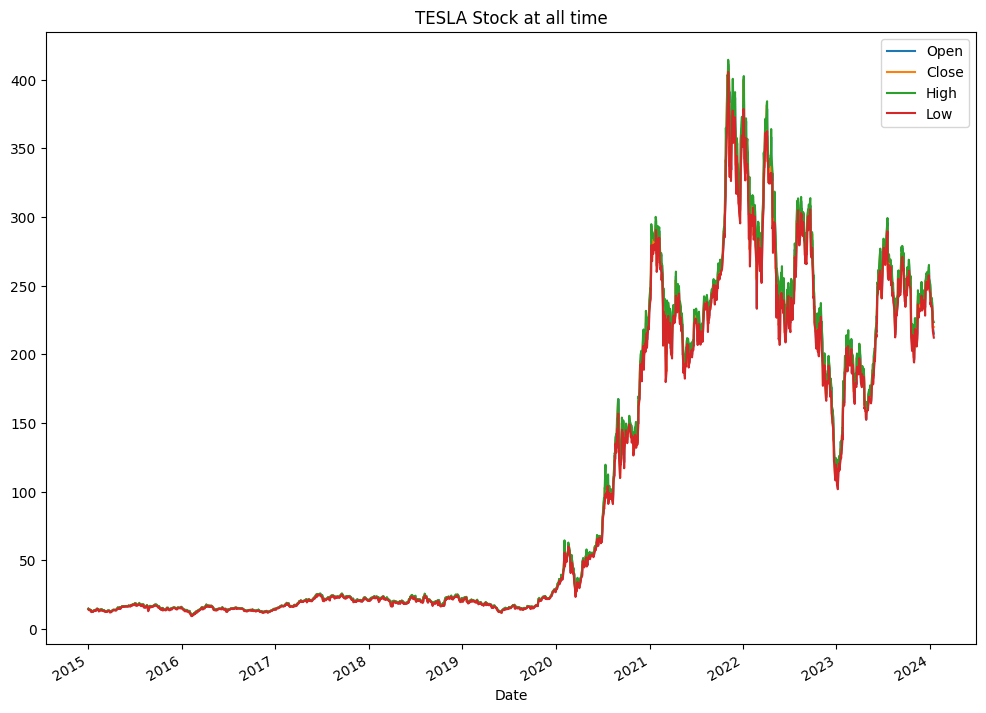

In [9]:
#Plot full Dataset
data[['Open','Close','High','Low']].plot(figsize = (12,9))
plt.title('TESLA Stock at all time')

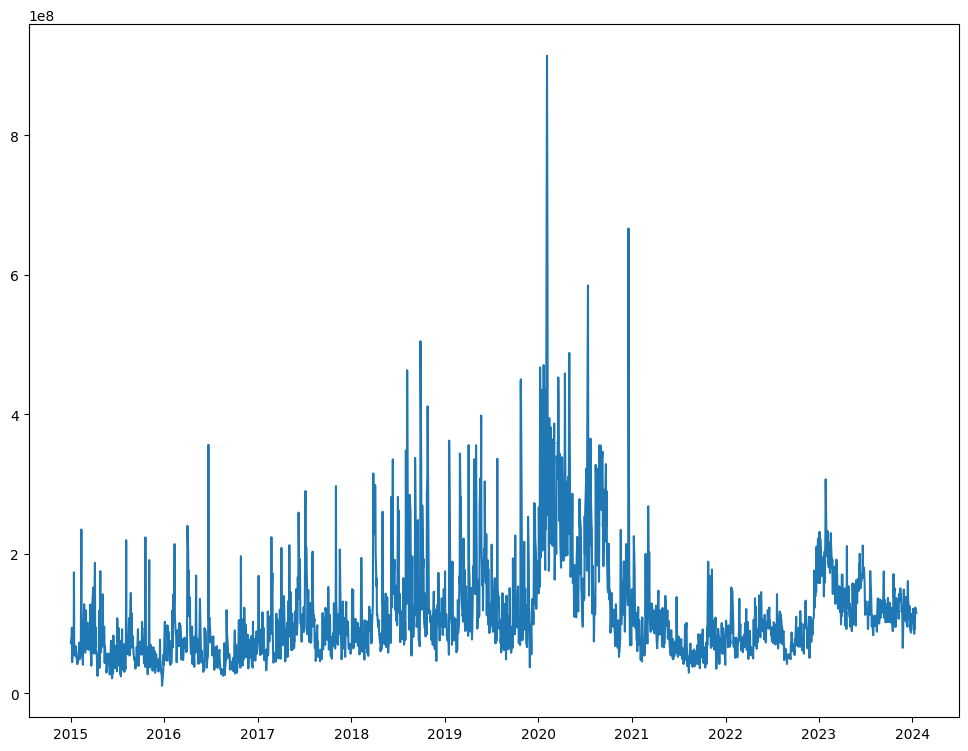

In [10]:
#Plot Dataset Volume
plt.figure(figsize=(12, 9))
plt.plot(data['Volume'])

Text(0.5, 1.0, 'TESLA Stock Price Action form 2015 to 2024')

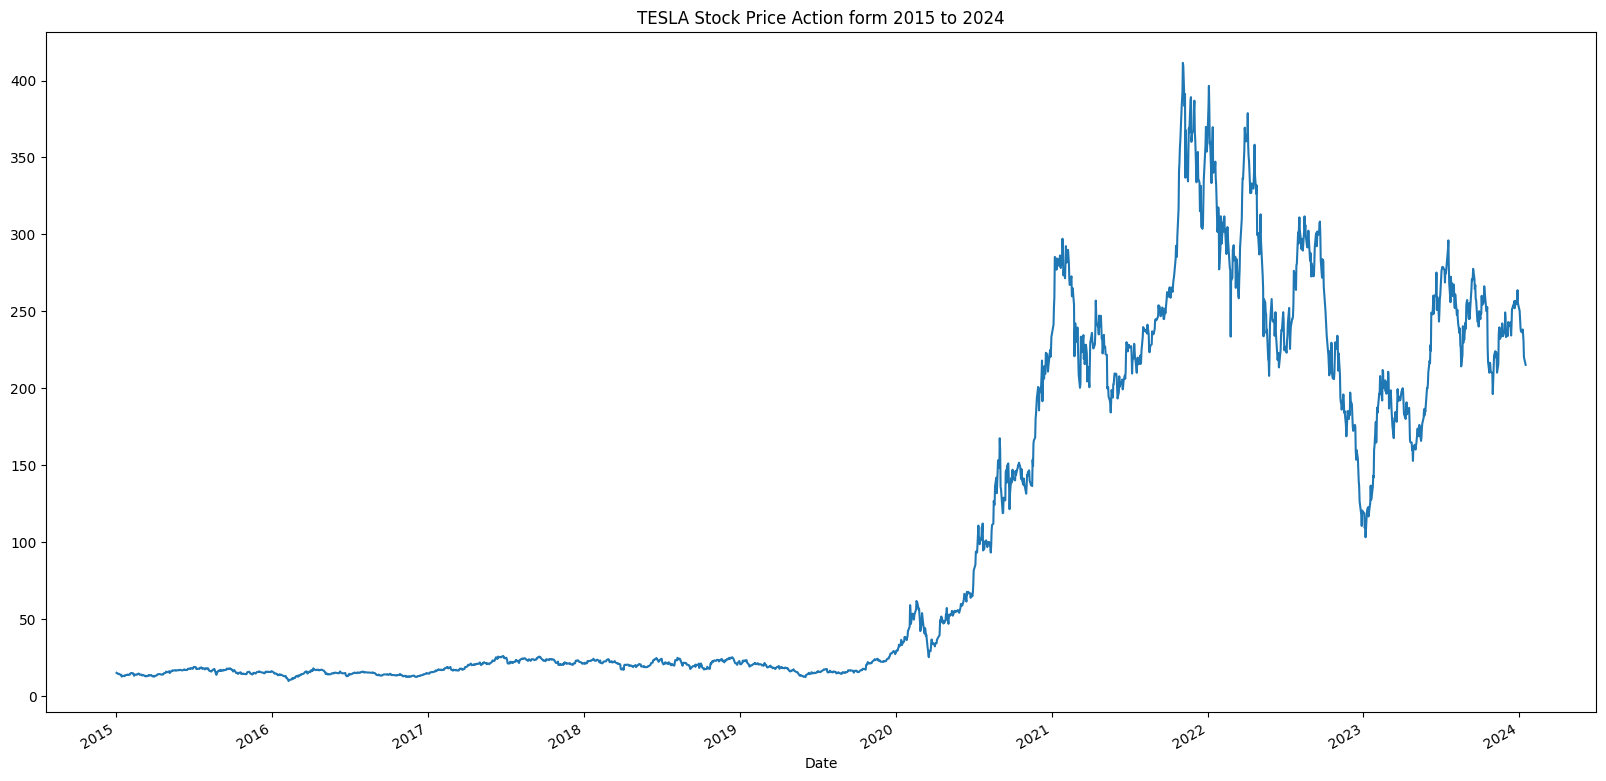

In [11]:
df = data['2015':'2024']


df['Open'].plot(figsize = (20,10), alpha = 1)
plt.title('TESLA Stock Price Action form 2015 to 2024')

## **Augmented Dickey Fuller Test (ADF)**
ADF is a statistical test used to determine whether a time series is stationary or non-stationary by examining the presence of unit roots in the series.

In [12]:
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [13]:
print(adf_test(data['High']))

Results of Dickey-Fuller Test:
Test Statistic                   -1.150079
p-value                           0.694694
#Lags Used                       27.000000
Number of Observations Used    2246.000000
Critical Value (1%)              -3.433265
Critical Value (5%)              -2.862828
Critical Value (10%)             -2.567456
dtype: float64
None


In [14]:
print(adf_test(data['High'].resample('MS').mean()))

Results of Dickey-Fuller Test:
Test Statistic                 -1.129396
p-value                         0.703208
#Lags Used                     10.000000
Number of Observations Used    98.000000
Critical Value (1%)            -3.498910
Critical Value (5%)            -2.891516
Critical Value (10%)           -2.582760
dtype: float64
None


Results of Dickey-Fuller Test:
Test Statistic                 -2.399346
p-value                         0.141921
#Lags Used                      9.000000
Number of Observations Used    98.000000
Critical Value (1%)            -3.498910
Critical Value (5%)            -2.891516
Critical Value (10%)           -2.582760
dtype: float64
None


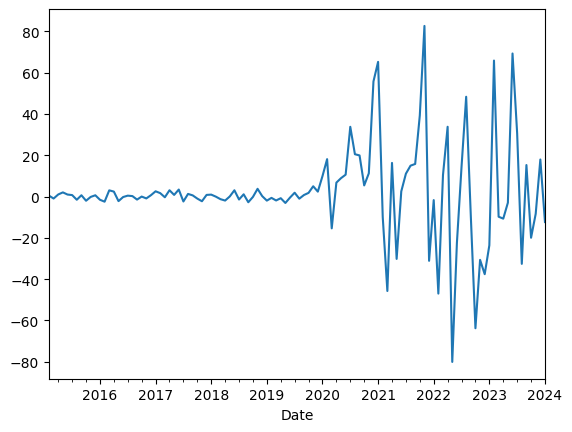

In [15]:
#Print the result of Dickey-Fuller Test
df_diff = df['Open'].resample('MS').mean() - df['Open'].resample('MS').mean().shift(1)
df_open_diff = df_diff.dropna()
df_open_diff.plot()

print(adf_test(df_open_diff))

## **DATA PREPROCESSING**

In [16]:
#Traning the dataset
train_df = df['High'].iloc[:-4]

X_train=[]
y_train=[]

for i in range(2, len(train_df)):
    X_train.append(train_df[i-2:i])
    y_train.append(train_df[i])

## **SPLITING DATA**
80% Traning and 20% Testing

In [17]:
import math
train_len = math.ceil(len(train_df)*0.8)
train_len

1816

In [18]:
X_train, y_train= np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## **CREATING LSTM MODEL**

In [19]:
# Function to create a more complex LSTM model
def create_complex_lstm_model(input_shape, learning_rate=0.001, dropout_rate=0.3):
    model = Sequential()
    # First LSTM layer with Batch Normalization
    model.add(LSTM(100, return_sequences=True, input_shape=input_shape))
    model.add(BatchNormalization())
    # Second LSTM layer
    model.add(LSTM(100, return_sequences=False))
    model.add(Dropout(dropout_rate))
    # Third LSTM layer
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(dropout_rate))
    # Output layer
    model.add(Dense(1))
    # Compile the model
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

In [20]:
# X_train and y_train are already defined
input_shape = (X_train.shape[1], 1)
model = create_complex_lstm_model(input_shape)

## **MODEL SUMMARY**





In [21]:
# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 2, 100)            40800     
                                                                 
 batch_normalization (Batch  (None, 2, 100)            400       
 Normalization)                                                  
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 50)                5050      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                        

In [22]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

In [23]:
# Fit the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=2, validation_split=0.15, callbacks=[early_stopping, reduce_lr])

Epoch 1/100
31/31 - 8s - loss: 18475.5840 - val_loss: 49122.3008 - lr: 0.0010 - 8s/epoch - 268ms/step
Epoch 2/100
31/31 - 0s - loss: 16138.4375 - val_loss: 42224.5742 - lr: 0.0010 - 230ms/epoch - 7ms/step
Epoch 3/100
31/31 - 0s - loss: 13310.0264 - val_loss: 32338.8906 - lr: 0.0010 - 209ms/epoch - 7ms/step
Epoch 4/100
31/31 - 0s - loss: 10315.1768 - val_loss: 23361.9375 - lr: 0.0010 - 205ms/epoch - 7ms/step
Epoch 5/100
31/31 - 0s - loss: 7515.0376 - val_loss: 14219.5586 - lr: 0.0010 - 204ms/epoch - 7ms/step
Epoch 6/100
31/31 - 0s - loss: 5105.3970 - val_loss: 7171.3887 - lr: 0.0010 - 217ms/epoch - 7ms/step
Epoch 7/100
31/31 - 0s - loss: 3311.9634 - val_loss: 3538.3809 - lr: 0.0010 - 215ms/epoch - 7ms/step
Epoch 8/100
31/31 - 0s - loss: 2239.8184 - val_loss: 1479.0880 - lr: 0.0010 - 230ms/epoch - 7ms/step
Epoch 9/100
31/31 - 0s - loss: 1681.0529 - val_loss: 2362.7068 - lr: 0.0010 - 293ms/epoch - 9ms/step
Epoch 10/100
31/31 - 0s - loss: 1136.2124 - val_loss: 2057.1326 - lr: 0.0010 - 280m

## **PLOTTING THE LOSS**

<Axes: >

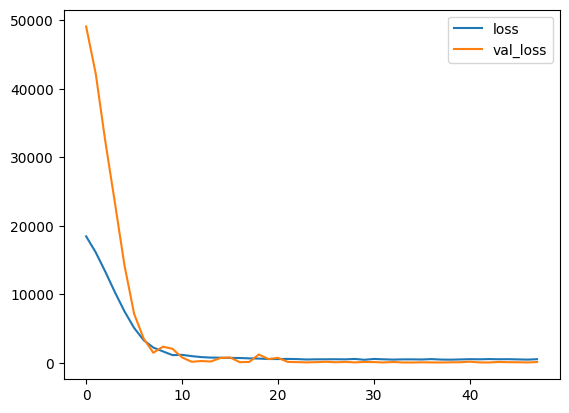

In [24]:
# Plotting loss
losses = pd.DataFrame(history.history)
losses[['loss', 'val_loss']].plot()

## **PREPARE THE VALIDATION DATA**

In [25]:
# Prepare the validation data
test_data = train_df[train_len-2:]
X_val, Y_val = [], []

for i in range(2, len(test_data)):
    X_val.append(test_data[i-2:i])
    Y_val.append(test_data[i])

In [26]:
X_val, Y_val = np.array(X_val), np.array(Y_val)
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))

## **MAKING PREDICTIONS**

In [27]:
# Making predictions
predictions = model.predict(X_val)

15/15 [==============================] - 1s 3ms/step


In [28]:
from sklearn.metrics import mean_squared_error
# Know the model error accuracy | the model accuracy
lstm_train_pred = model.predict(X_train)
lstm_valid_pred = model.predict(X_val)
print('Train rmse:', np.sqrt(mean_squared_error(y_train, lstm_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(Y_val, lstm_valid_pred)))

15/15 [==============================] - 0s 2ms/step
Train rmse: 7.909683945541118
Validation rmse: 9.484026902944889


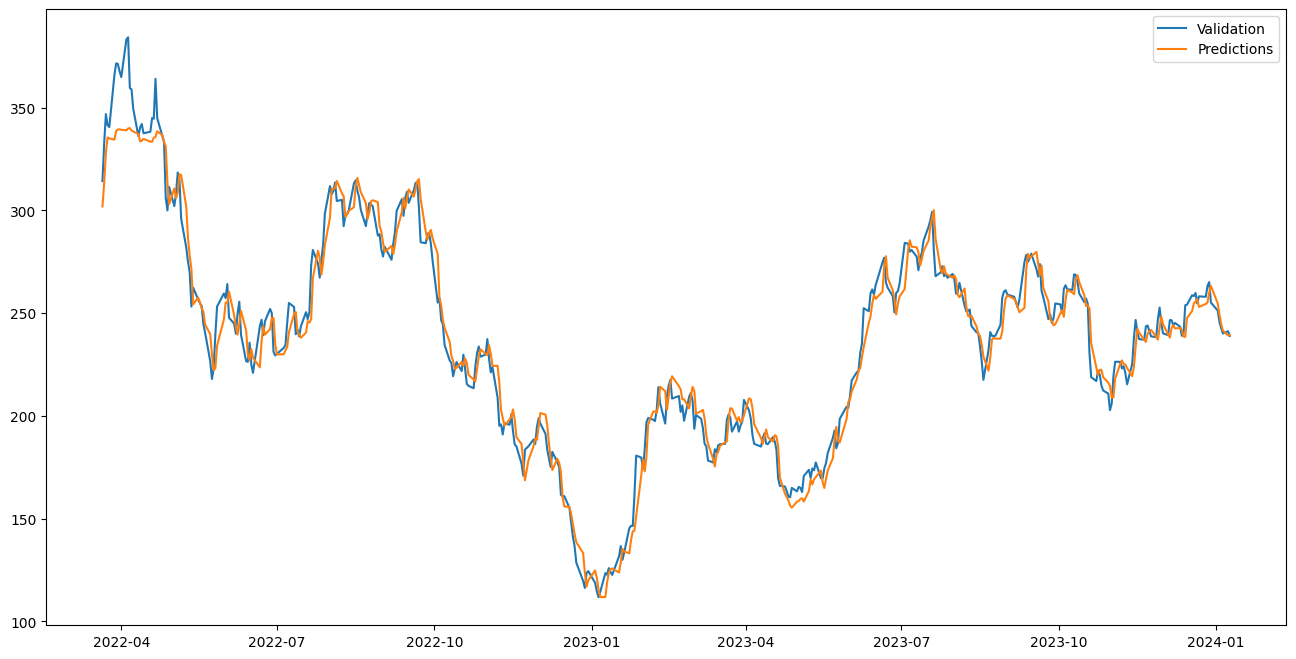

In [29]:
valid = pd.DataFrame(train_df[train_len:])
valid['Predictions']=lstm_valid_pred
plt.figure(figsize=(16,8))
plt.plot(valid[['High','Predictions']])
plt.legend(['Validation','Predictions'])
plt.show()

In [30]:
#DataFrame to see the percentage of error between real and predicted
variance = []
for i in range(len(valid)):

  variance.append(valid['High'][i]-valid['Predictions'][i])
variance = pd.DataFrame(variance)
variance.describe()

0
count  454.000000
mean     0.818743
std      9.459044
min    -25.298798
25%     -5.094360
50%      0.622627
75%      6.206902
max     44.369934

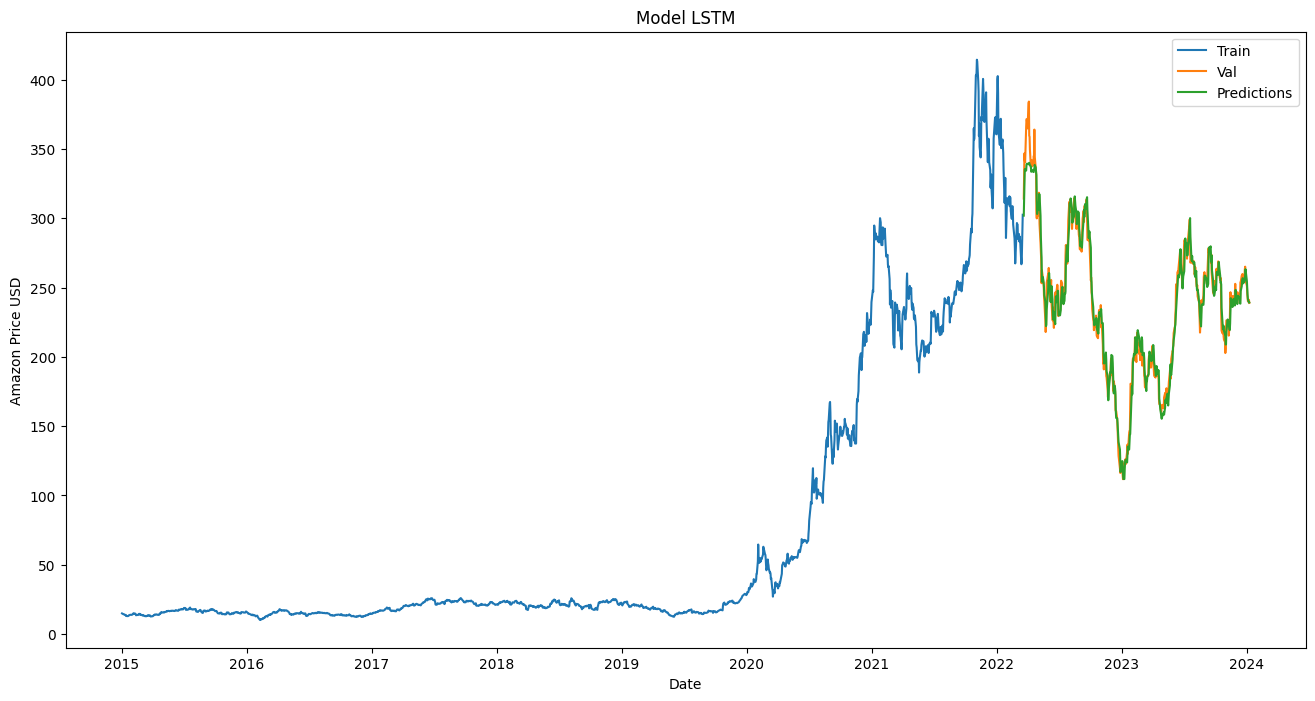

In [31]:
#Ploting the real and predicted dataframe
train = train_df[:train_len]
valid = pd.DataFrame(train_df[train_len:])
valid['Predictions']=lstm_valid_pred

plt.figure(figsize=(16,8))
plt.title('Model LSTM')
plt.xlabel('Date')
plt.ylabel('Amazon Price USD')
plt.plot(train)
plt.plot(valid[['High','Predictions']])
plt.legend(['Train','Val','Predictions'])
plt.show()

## **Prepare Input Data for Forecasting**

In [32]:
forecast_input = X_val[-1:]

In [33]:
#Generate Predictions for Next 30 Days
def forecast_next_days(model, initial_data, days_to_predict=30):
    prediction_list = initial_data.tolist()  # Convert to list

    for _ in range(days_to_predict):
        x = np.array(prediction_list[-2:]).reshape(1, 2, 1)
        next_prediction = model.predict(x)[0, 0]
        prediction_list.append(next_prediction.item())
    return prediction_list[2:]

# Generate predictions
next_30_days = forecast_next_days(model, forecast_input.flatten(), 30)

1/1 [==============================] - 0s 17ms/step


In [34]:
#Append Predictions to Existing Data
# Add these predictions to 'valid' DataFrame
last_date = valid.index[-1]  # Last date in your existing data
new_dates = pd.date_range(start=last_date, periods=31, inclusive='right')  # 30 new dates after the last date
new_predictions = pd.DataFrame(next_30_days, index=new_dates, columns=['Predictions'])

# Concatenate with the existing 'valid' DataFrame
extended_valid = pd.concat([valid, new_predictions])

In [35]:
print(extended_valid)

                  High  Predictions
2022-03-21  314.283325   301.955963
2022-03-22  332.619995   313.391022
2022-03-23  346.899994   327.999756
2022-03-24  341.496674   335.567841
2022-03-25  340.600006   335.075531
...                ...          ...
2024-02-04         NaN   230.275833
2024-02-05         NaN   230.241913
2024-02-06         NaN   230.212799
2024-02-07         NaN   230.187836
2024-02-08         NaN   230.166412

[484 rows x 2 columns]


In [36]:
import plotly.graph_objects as go
from IPython.display import HTML

fig = go.Figure()

# Plot original data
fig.add_trace(go.Scatter(x=valid.index, y=valid['High'], mode='lines', name='Actual High'))

# Plot predictions (including the next 30 days)
fig.add_trace(go.Scatter(x=extended_valid.index, y=extended_valid['Predictions'], mode='lines', name='Predictions'))

fig.update_layout(title='Tesla Price Forecast', xaxis_title='Date', yaxis_title='Price (USD)')

# Generate HTML for the figure
plot_html = fig.to_html()

# Display the HTML
HTML(plot_html)
